# <a id='toc1_'></a>[Ramp on predicting likes in Dating Apps](#toc0_)

Charlotte Cournon, Solène Debuysère, Godefroy Du Chalard, Yanis Lalou, Agathe Minaro, Luka Trailovic

**Table of contents**<a id='toc0_'></a>    
- [Ramp on predicting likes in Dating Apps](#toc1_)    
  - [Introduction](#toc1_1_)    
  - [Getting started with the RAMP Starting Kit](#toc1_2_)    
    - [Software prerequisites](#toc1_2_1_)    
    - [Getting the data](#toc1_2_2_)    
  - [The Data](#toc1_3_)    
    - [Get the data and Preprocessing it](#toc1_3_1_)    
      - [Description of each column](#toc1_3_1_1_)    
      - [Explication of the preprocessing of each column](#toc1_3_1_2_)    
  - [Analysis of the data](#toc1_4_)    
    - [Analysis of the quantitative features](#toc1_4_1_)    
    - [Statistical analysis](#toc1_4_2_)    
    - [Geographic visualization](#toc1_4_3_)    
    - [Analysis of features with the target](#toc1_4_4_)    
      - [Histogram of the number of likes](#toc1_4_4_1_)    
      - [Verified status & VIP subscription](#toc1_4_4_2_)    
    - [Correlation study](#toc1_4_5_)    
  - [Workflow](#toc1_5_)    
    - [The model to submit](#toc1_5_1_)    
    - [Evaluation](#toc1_5_2_)    
    - [Evaluation with Cross-Validation](#toc1_5_3_)    
  - [Submit on Ramp Studio](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Introduction](#toc0_)

Our society is evolving, becoming more complex, more intensive and, above all, more numeric. In today’s digital era, social media platforms have become an omnipresent part in our daily life. Sharing, liking, commenting and posting are the basic actions to show our interest in other people's passions or to simply share our own.
Very quickly, new types of social networks have emerged, for example to create professional networks, to talk anonymously or to date. In fact, these dating applications are used on a much larger scale than one might think, and therefore bring many challenges with their use.

As dating apps such as Tinder or Lovoo grew in popularity, individuals sought to optimize their profiles to improve their scores of receiving more matches and potential connections.


**This challenge is about Lovoo, but one may wonder what Lovoo is.**

Lovoo is not just a dating app, it allows users to chat with new people, meet attractive singles, and enjoy live videos in real-time. It is originally a website that was expanding in European countries during spring 2015. In parallel, Tinder was growing in popularity in America and Europe thus accentuating the competition between the dating applications. At that time, Lovoo's iOS app was in version 3 and has been improving ever since. Thanks to a constant betterment of its data and algorithms, this app prioritized mutual attraction as a prerequisite for any communication between two people. It is in the interest of Lovoo to reinforce the importance of making a favorable first impression.

Moreover, captivating, charismatic and inspiring people have long held a fascination for us, as they often command more followers and listeners. Social networks utilize various metrics, such as the number of friends or followers, to gauge an individual's potential charisma. This latter indicator, often hidden by dating applications, is a keystone of meetings’ optimization between users.
    
    
**The motivation :**

This Lovoo dataset provides valuable insights into a range of numerical data from the app, such as the gender or the age of the person, or even more specific information as can be the vip subscription or the last online date.
These features, combined with each other or with external information, could quantify other characteristics that are not numerical including popularity, charisma, census, as well as statistics about the interests of dating app users. To delve deeper into these questions, we may explore questions such as what factors constitute a great user profile, how to craft a compelling first impression to increase matches and forge new connections, what traits contribute to a person's charisma, and how charismatic individuals present themselves.


**The dataset :**

The dataset contains information about user profiles on Lovoo. It also includes additional information about user profile pictures, which were collected to investigate potential correlations between a profile picture and the success or reputation of a profile. 

It was hypothesized that a profile picture could significantly impact metrics such as the number of profile visits and matches due to the importance of first impressions. However, only a small part of a user's profile is visible when browsing through a list of users. Furthermore, we can note that the recommendation algorithm consistently produced the same set of user profiles, suggesting that Lovoo's algorithm heavily relied on location settings and potentially cookies. Therefore, the dataset may lack a diverse range of user profiles.


**The challenge :**

The objective of this RAMP challenge is to investigate these questions by collecting user profile data and metrics in order to better understand user behaviours and relationships on Lovoo.
It proposes designing the best algorithm to **predict the number of likes for each user profile**. The dataset, which includes 31 features for 3193 users, will be provided to the participants for testing and calibration of their algorithm. Additionally, after removing the features that we did not consider important, we have pre-processed several other features so that the challenge can be quickly taken up.

## <a id='toc1_2_'></a>[Getting started with the RAMP Starting Kit](#toc0_)

### <a id='toc1_2_1_'></a>[Software prerequisites](#toc0_)

This starting kit requires several packages, to install them, you can directly run from the root of the starting kit:
    
    pip install -r requirements.txt

### <a id='toc1_2_2_'></a>[Getting the data](#toc0_)

To download the public data, you can run from the root of the starting kit:

    python download_data.py

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <a id='toc1_3_'></a>[The Data](#toc0_)
### <a id='toc1_3_1_'></a>[Get the data and Preprocessing it](#toc0_)

In [2]:
from problem import get_train_data, get_test_data

In [3]:
data_train, target_train = get_train_data()
data_test, target_test = get_test_data()

In [4]:
data_train.head()

,gender,genderLooking,age,counts_details,counts_pictures,counts_profileVisits,counts_fans,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,...,verified,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,connectedToFacebook,locationCity,Latitude,Longitude,description
userId,,,,,,,,,,,,,,,,,,,,,
535585c9140ba0be2a8b4ec4,0,3,24,0.90,10,12199,0,1,1,1,...,0,1,1430092800000000000,1.430163e+09,0,0.0,Marktheidenfeld,49.845280,9.606720,1
535c9b2f190ba04c408b7cc1,0,3,22,0.80,3,84,0,0,0,1,...,0,1,1430006400000000000,1.430035e+09,0,0.0,Bern,46.948271,7.451451,0
54d78595c86da1302f8b48b0,0,1,25,0.96,15,2433,0,1,0,0,...,1,1,1428278400000000000,1.428320e+09,0,NaN,NaN,46.314475,11.048029,1
537e5414190ba0ee648b4db1,0,1,20,0.73,22,2392,4,0,1,0,...,0,1,1428451200000000000,1.428506e+09,0,0.0,Borgomanero,45.698911,8.462367,0
53055430cb6da17a878b49b6,0,1,22,1.00,3,619,0,1,0,0,...,0,1,1428883200000000000,1.428887e+09,0,0.0,Ghemme,45.598346,8.420903,1


In [5]:
data_train.columns

Index(['gender', 'genderLooking', 'age', 'counts_details', 'counts_pictures',
       'counts_profileVisits', 'counts_fans', 'flirtInterests_chat',
       'flirtInterests_friends', 'flirtInterests_date', 'country',
       'isFlirtstar', 'isHighlighted', 'isInfluencer', 'isMobile', 'isNew',
       'isOnline', 'isVip', 'lang_count', 'lang_fr', 'lang_en', 'lang_de',
       'lang_it', 'lang_es', 'lang_pt', 'verified', 'shareProfileEnabled',
       'lastOnlineDate', 'lastOnlineTime', 'birthd', 'connectedToFacebook',
       'locationCity', 'Latitude', 'Longitude', 'description'],
      dtype='object')

#### <a id='toc1_3_1_1_'></a>[Description of each column](#toc0_)

- *gender* : user's gender: F for female
- *genderLooking* : gender the user indicated an interest for
- *age* : user age
- *counts_details* : number of information on a user's profile
- *counts_pictures* : number of pictures on the user's profile
- *counts_fans* : Number of followers
- *flirtInterests_chat* : Whether the user indicated being in search for people to chat with
- *flirtInterests_friends* : Whether the user indicated being open to making friends
- *flirtInterests_date* : Whether the user indicated being open to dating people
- *country* : user's country
- *isFlirtstar* : Whether the user account that fetched the dataset "liked" this user's profile. Playing around with "liking" profiles while fetching a dataset could help better understand the site's recommendation algorithm
- *isHighlighted* : Whether the user's profile is currently highlighted (at fetch time). A user can use in-app currency to have one's profile temporarily highlighted and get more impressions/matches
- *isInfluencer* : whether this is an influencer account
- *isMobile* : whether the user uses the mobile app
- *isNew*: the user account is recently created
- *isOnline* : whether the user was connected at time of fetch 
- *isVip* : 1 if the user is VIP. It was possible to buy a VIP status with real money. This status came with benefits
- *lang_count* : Number of languages the user knows
- *lang_fr* : whether the user knows french
- *lang_en* : whether the user knows english 
- *lang_de* : whether the user knows german
- *lang_it* : whether the user knows italian
- *lang_es* : whether the user knows spanish
- *lang_pt* : whether the user knows portuguese
- *verified* : whether the user's account was verified through one of the methods (Facebook, phone number)
- *shareProfileEnabled* : user allows her profile to be shared
- *lastOnlineDate* : last login time of the user. One login session can last several hours 
- *lastOnlineTime* : last login time the user was connected, as timestamp.
- *birthd* : whether the user's birthday is today (time of fetch)
- *connectedToFacebook* : 0 or 1 (connected to facebook or not)
- *locationCity* : location of the city and *Latitude*, *Longitude* : the latitude, longitude of the city
- *description* : User status message (main status message) : 0 (no description) ou 1 (description)

#### <a id='toc1_3_1_2_'></a>[Explication of the preprocessing of each column](#toc0_)

The data used for this challenge comes from the websites data world which provides a large amount of various datasets. Two diferent datasets giving informations about lovoo users have been used. The second dataset contains informations about less users than the first one. 

Also, a lot of informations are duplicated in both datasets. Therefore, we first deleted redundant informations and then merged the two datasets on the user's Ids. We also deleted features we judged useless or for which ones we did not have description. 

Also, we converted boolean features to binary ones (0 for False and 1 for True). For the features gender and genderLooking we converted 'F' and 'M' into 0 and 1. Also, we converted the 'both' values of genderLooking into 2 and the none into 3. In addition, we changed the description feature (named 'whazzup' in the original dataset) to 0 if empty and 1, otherwise.

We kept two features string format : the country and city ones. The others features are all in numerical formats.

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3193 entries, 535585c9140ba0be2a8b4ec4 to 55204d28076ea157768b48da
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3193 non-null   int64  
 1   genderLooking           3193 non-null   int64  
 2   age                     3193 non-null   int64  
 3   counts_details          3193 non-null   float64
 4   counts_pictures         3193 non-null   int64  
 5   counts_profileVisits    3193 non-null   int64  
 6   counts_fans             3193 non-null   int64  
 7   flirtInterests_chat     3193 non-null   int64  
 8   flirtInterests_friends  3193 non-null   int64  
 9   flirtInterests_date     3193 non-null   int64  
 10  country                 3193 non-null   int8   
 11  isFlirtstar             3193 non-null   int64  
 12  isHighlighted           3193 non-null   int64  
 13  isInfluencer            3193 non-null   int64  
 14  is

## <a id='toc1_4_'></a>[Analysis of the data](#toc0_)
### <a id='toc1_4_1_'></a>[Analysis of the quantitative features](#toc0_)

We have below five histograms that represent the distribution of five variables in the dataset:
- The first histogram displays the age of the different users of the platform. Most people are between 18 and 25 years old. On average they are 22 years old. The users of the platform are relatively young. 
- The second histogram shows the amount of information they have put on their profile. We see that a very large part of the users have not put anything on their profile. Are they attractive despite a lack of information about them ? The median is at 0.6, so they have completed their profile at 60%.  
- The third histogram shows the number of photos on their profiles. On average, users post five photos of themselves. 
- The fourth graph shows the number of languages spoken by the users, most of the users speak only their mother tongue. Nevertheless, the number of languages spoken is complicated to evaluate from their profiles.
- The fifth graph shows the number of followers for each account.

In [7]:
quant_features = ['age', 'counts_details', 'counts_pictures','counts_fans', 'lang_count']
data_train[quant_features].describe()

,age,counts_details,counts_pictures,counts_fans,lang_count
count,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000
mean,22.015346,0.569966,4.740683,2.218290,1.104917
std,1.961267,0.327103,4.365337,11.537626,0.566906
min,19.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.310000,2.000000,0.000000,1.000000
50%,22.000000,0.620000,4.000000,0.000000,1.000000
75%,24.000000,0.850000,6.000000,0.000000,1.000000
max,28.000000,1.000000,30.000000,237.000000,9.000000


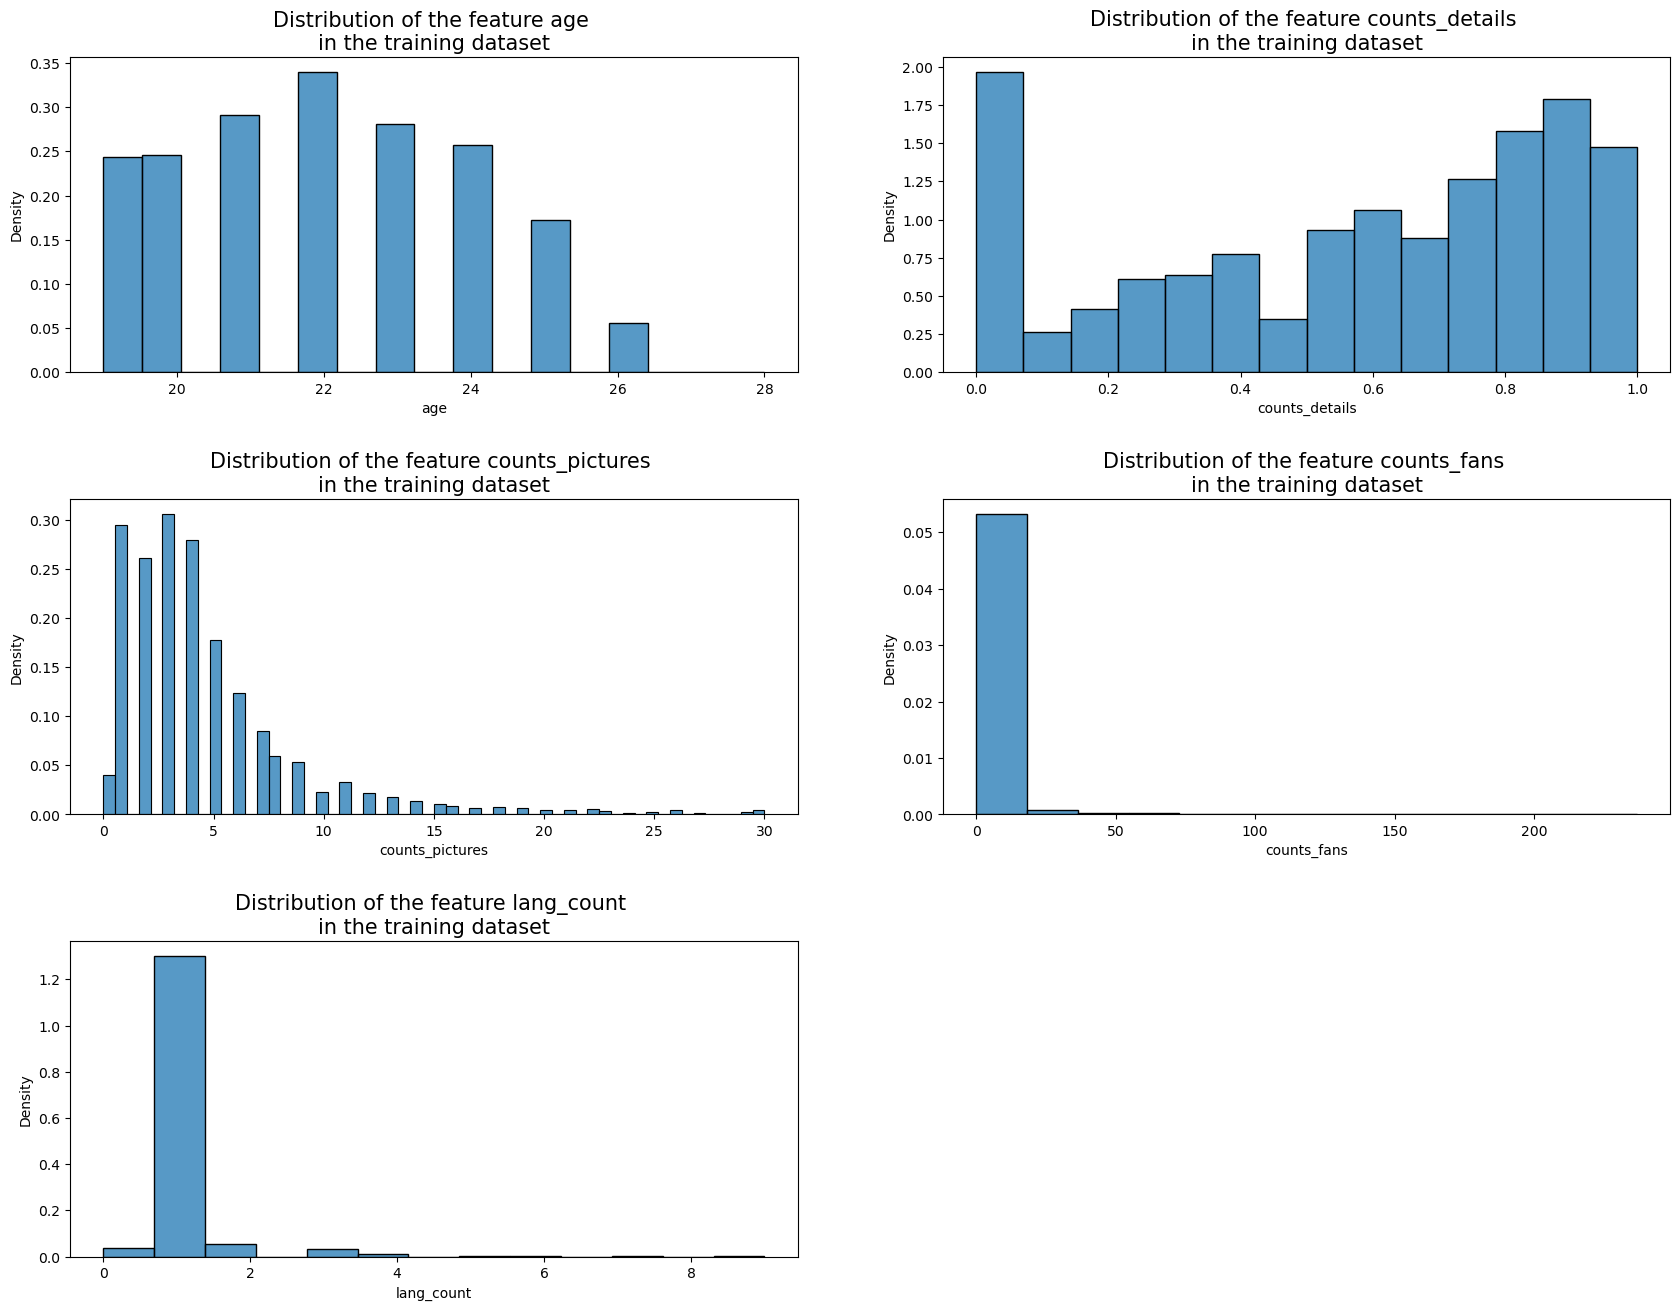

In [8]:
for i, col in enumerate(quant_features):
    plt.figure(1, figsize=(20, 15))
    plt.subplot(3, 2, i+1)
    sns.histplot(data=data_train, x=col, stat="density", color="Tab:blue")
    plt.title("Distribution of the feature {} \nin the training dataset".format(col), fontsize=15, pad=5)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

### <a id='toc1_4_2_'></a>[Statistical analysis](#toc0_)


Whether a user likes a profile or not depends on many parameters, and the reason why a person installed the application is an important factor. Below is the distribution of reasons for being on the application according to age. The fact that more people are looking to make friends or chat shows the broader nature of the application as a social network. <br>
Also, can see that age has a very little influence on the expectations of each person. Between 19 and 26 years old they usually want the same thing:
- 50-60% of people want to chat, make new friends.
- 30-40% of people want to get a date. This number increases very slightly with age.


In [9]:
# Define the filtering parameter(s)
filterAge = -1
includeInterestInChats = True

# Define the function to calculate the statistics
def calculate_statistics(df):
    nbUsers = df['age'].count()
    wantChats = df[df['flirtInterests_chat'] == 1]['age'].count()
    wantFriends = df[df['flirtInterests_friends'] == 1]['age'].count()
    wantDates = df[df['flirtInterests_date'] == 1]['age'].count()
    nbGay = np.sum(np.where((df['genderLooking'] == df['gender']) | (df['genderLooking'] == 'both'), 1, 0))
    kissesReceived = df['counts_details'].sum()
    visitsReceived = df['counts_details'].sum()
    totalFollowers = df['counts_fans'].sum()
    languagesSpoken = df['lang_count'].sum()
    
    # Calculate the statistics
    percentWantChats = round(100 * wantChats / nbUsers, 1)
    percentWantFriends = round(100 * wantFriends / nbUsers, 1)
    percentWantDates = round(100 * wantDates / nbUsers, 1)
    meanKissesReceived = int(np.floor(kissesReceived / nbUsers))
    meanVisitsReceived = round(visitsReceived / nbUsers, 1)
    meanFollowers = round(totalFollowers / nbUsers, 1)
    meanLanguagesKnown = round(languagesSpoken / nbUsers, 2)
    
    # Create a dataframe with the statistics
    statistics = {'age': df['age'].iloc[0],
                  'nbUsers': nbUsers,
                  'percentWantChats': percentWantChats,
                  'percentWantFriends': percentWantFriends,
                  'percentWantDates': percentWantDates,
                  'usersLookingForSameSex': nbGay,
                  'meanKissesReceived': meanKissesReceived,
                  'meanVisitsReceived': meanVisitsReceived,
                  'meanFollowers': meanFollowers,
                  'meanLanguagesKnown': meanLanguagesKnown,
                  'totalWantChants': wantChats,
                  'totalWantFriends': wantFriends,
                  'totalWantDates': wantDates,
                  'totalKissesReceive': kissesReceived,
                  'totalVisitsReceived': visitsReceived,
                  'totalFollowers': totalFollowers,
                  'totalLanguagesSpoken': languagesSpoken}
    
    statistics_df = pd.DataFrame.from_dict(statistics, orient='index').T
    
    return statistics_df

# Filter the dataframe based on the filtering parameter(s)
if filterAge >= 0:
    lovoo_v3_users_api_results_df = data_train[data_train['age'] == filterAge]
if includeInterestInChats:
    lovoo_v3_users_api_results_df = data_train[data_train['flirtInterests_chat'].notnull()]

# Group the dataframe by age and calculate the statistics for each group
statistics_df = lovoo_v3_users_api_results_df.groupby('age').apply(calculate_statistics)

# Reset the index of the resulting dataframe
statistics_df = statistics_df.reset_index(drop=True)

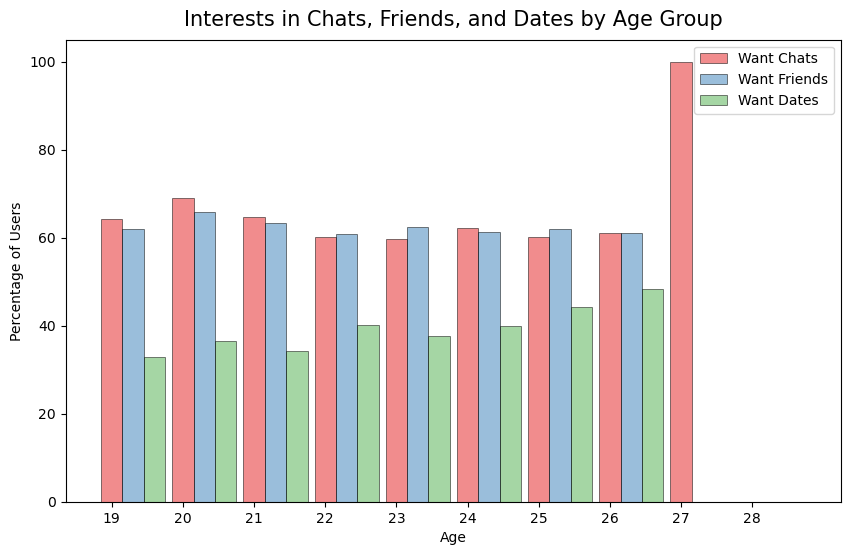

In [10]:
# Create the bar plot
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x=statistics_df['age'], height=statistics_df['percentWantChats'], width=0.3, label='Want Chats', color="#e41a1c", alpha=0.5, edgecolor='black', linewidth=0.7)
ax.bar(x=statistics_df['age']+0.3, height=statistics_df['percentWantFriends'], width=0.3, label='Want Friends', color="#377eb8", alpha=0.5, edgecolor='black', linewidth=0.7)
ax.bar(x=statistics_df['age']+0.6, height=statistics_df['percentWantDates'], width=0.3, label='Want Dates', color="#4daf4a", alpha=0.5, edgecolor='black', linewidth=0.7)

# Add labels and titles
ax.set_xlabel('Age')
ax.set_ylabel('Percentage of Users')
ax.set_title('Interests in Chats, Friends, and Dates by Age Group', fontsize=15, pad=10)
ax.set_xticks(statistics_df['age'])
ax.legend()

plt.show()


### <a id='toc1_4_3_'></a>[Geographic visualization](#toc0_)

Below is an interactive map that allows to see the density of users that downloaded Lovoo.
The users of the application live mainly in Central Europe. The density of users is very high in Switzerland, Eastern France and of course Germany, where the application was originally developed.

In [11]:
from shapely.geometry import Point
from folium import plugins
import folium

def plot_heatmap_count(df):
    df_map = df.groupby(['locationCity']).size().reset_index(name='count')

    df_map['Latitude'] = df_map['locationCity'].apply(lambda x: df[df['locationCity'] == x]['Latitude'].values[0] if df[df['locationCity'] == x].values.any(None) else np.nan)
    df_map['Longitude'] = df_map['locationCity'].apply(lambda x: df[df['locationCity'] == x]['Longitude'].values[0] if df[df['locationCity'] == x].values.any(None) else np.nan)

    #df['Longitude'] = df['locationCity'].apply(lambda x: df_2[df_2['City'] == x]['Longitude'])
    df_map["Coordinates"] = list(zip(df_map.Longitude, df_map.Latitude))
    df_map["Coordinates"] = df_map["Coordinates"].apply(Point)
    df_map = df_map.dropna()

    map = folium.Map(location=[45, 15], tiles="Cartodb dark_matter", zoom_start=4)

    heat_data = [[point.xy[1][0], point.xy[0][0]] for point in df_map['Coordinates']]

    plugins.HeatMap(heat_data, min_opacity=0.2,  name='Heatmap').add_to(map)


    display(map)

In [12]:
plot_heatmap_count(data_train)

### <a id='toc1_4_4_'></a>[Analysis of features with the target](#toc0_)
#### <a id='toc1_4_4_1_'></a>[Histogram of the number of likes](#toc0_)

Although, the maximum value of target_train is 6155, the target's values are much more concentrated on the lowest values.

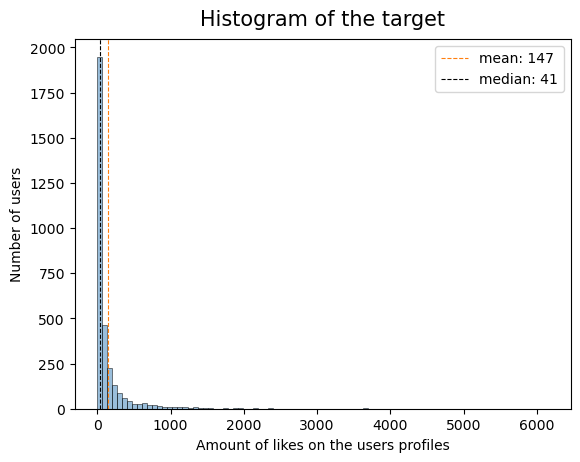

In [13]:
plt.hist(target_train, bins=90, edgecolor='black', color='#377eb8', linewidth=0.7, alpha=0.5)
plt.title('Histogram of the target', fontsize=15, pad=10)
plt.xlabel('Amount of likes on the users profiles')
plt.ylabel('Number of users')
plt.axvline(x=target_train.mean(), color='#ff7f0e', label='mean: ' +str(round(target_train.mean())), linewidth=0.8, linestyle='--')
plt.axvline(x=target_train.median(), color='black', label='median: ' +str(round(target_train.median())), linewidth=0.8, linestyle='--')
plt.legend(loc='best')
plt.show()
print()

In [14]:
max(target_train)

6155

The below box plot is in direct link with the geographic visualization. Indeed, we see the link between the number of languages spoken and the number of likes. On average, the more languages you speak the more likes you get. Lovoo is an app that was created in Germany, thus is famous in the West of Europe, where several languages are spoken (for example in Switzerland). <br>
Perhaps speaking more than one language would simply allow you to meet more people and therefore get more likes...
Or, is speaking several languages a criterion of desirability?

/opt/anaconda3/envs/ramp-challenge/lib/python3.10/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


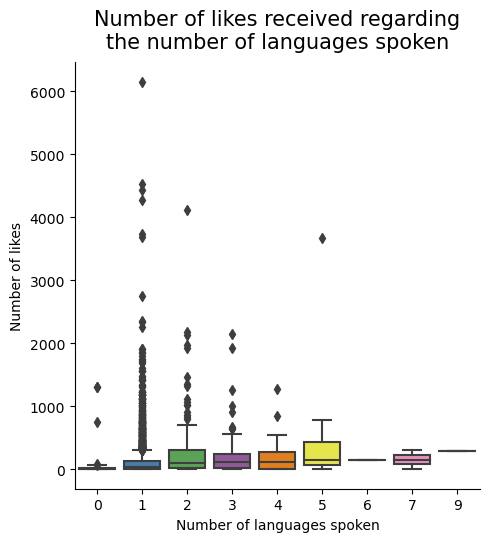

In [15]:
sns.catplot(x="lang_count", y=target_train.values, kind="box", data=data_train, palette="Set1")
plt.title("Number of likes received regarding\nthe number of languages spoken", fontsize=15, pad=10)
plt.xlabel("Number of languages spoken")
plt.ylabel("Number of likes")
plt.show()

Now let's look at some histograms. First, we are going to differentiate between users with and without a description. Then, we can look at this histogram which differentiates whether users that are above or below the median age (which is 22). Finally, we differentiate whether users have more or less photos than the median amount of pictures (which is 4).

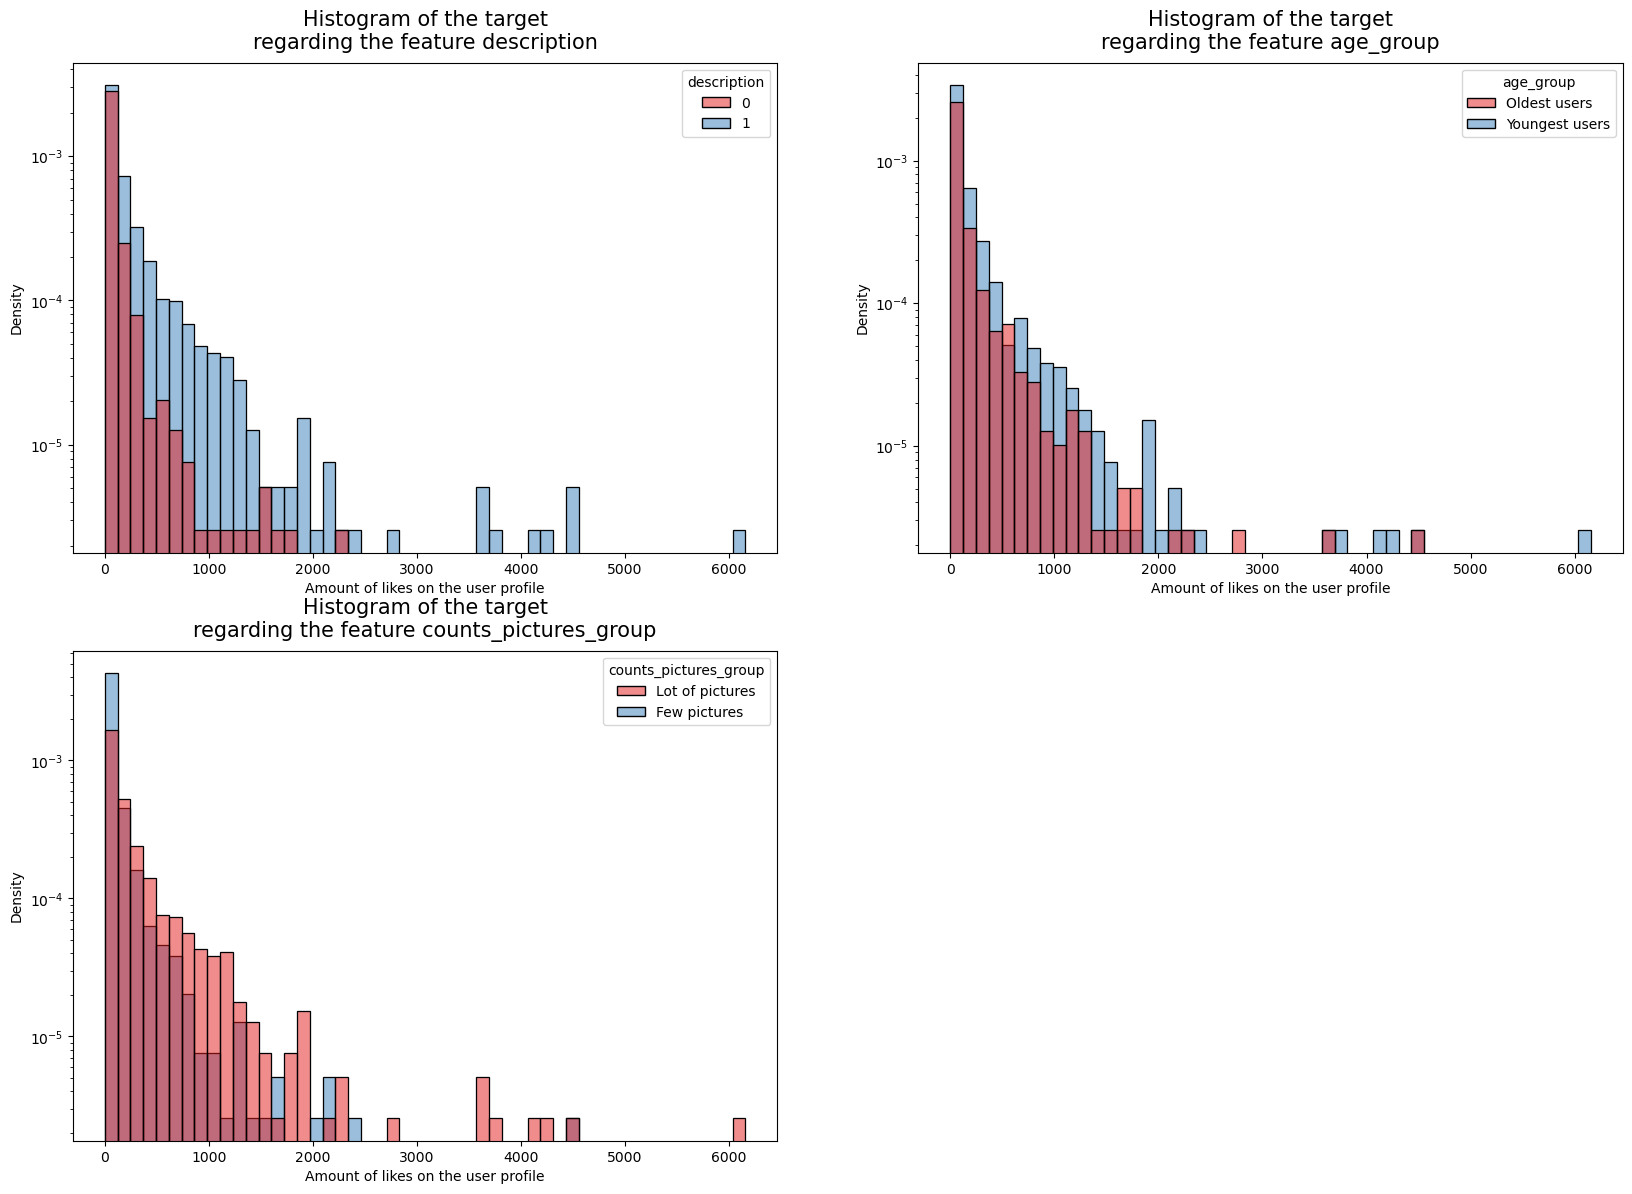

In [17]:
data_train_target = data_train.join(target_train, on=target_train.index)

median_age = data_train['age'].median() #computation of the median age
conditions = [data_train_target['age'] > median_age, data_train_target['age'] <= median_age]
values = ["Oldest users", "Youngest users"]
data_train_target['age_group'] = np.select(conditions, values)

median_count_pictures = data_train['counts_pictures'].median() #computation of the median age
conditions = [
    data_train_target['counts_pictures'] > median_count_pictures,
    data_train_target['counts_pictures'] <= median_count_pictures
    ]
values = ["Lot of pictures", "Few pictures"]
data_train_target['counts_pictures_group'] = np.select(conditions, values)

columns = ['description', 'age_group', 'counts_pictures_group']

for i, col in enumerate(columns):
    plt.figure(1, figsize=(20, 14))
    plt.subplot(2, 2, i+1)
    sns.histplot(
        data=data_train_target,
        x="counts_kisses",
        hue=col,
        stat="density",
        bins=50,
        palette="Set1",
        legend=True)
    plt.title('Histogram of the target\nregarding the feature {}'.format(col), fontsize=15, pad=10)
    plt.xlabel('Amount of likes on the user profile')
    plt.yscale('log')
    plt.ylabel('Density')

The plot above is quite relevant, indeed, most users don't even take the time to read the description and like a person only based on photos. We can see with the box plot below that the number of photos has an impact on the number of likes, up to a certain threshold. 

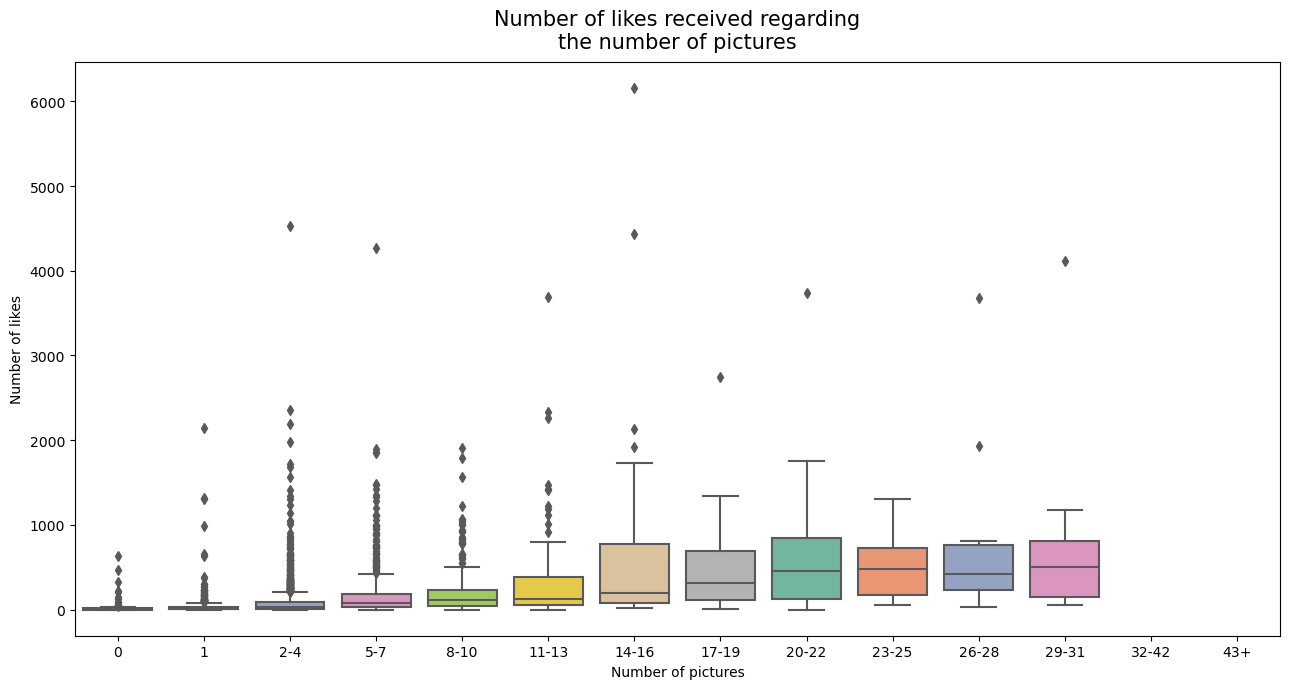

In [18]:
# Define the categories for counts_pictures
categories = [0, 1, '2-4', '5-7', '8-10', '11-13', '14-16', '17-19', '20-22', '23-25', '26-28', '29-31', '32-42', '43+']

# Create a new column with the categories of counts_pictures
df_plot = pd.cut(data_train['counts_pictures'], bins=[-1, 0, 1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 42, np.inf], labels=categories).to_frame()
df_plot.columns = ['counts_pictures_categories']

# Plot the boxplot with the new column
fig, ax = plt.subplots(figsize=(13,7))
ax = sns.boxplot(x="counts_pictures_categories", y=target_train.values, data=df_plot, palette="Set2")
ax.axes.set_title("Number of likes received regarding\nthe number of pictures", fontsize=15, pad=10)
ax.set_xlabel("Number of pictures")
ax.set_ylabel("Number of likes")
plt.tight_layout()


#### <a id='toc1_4_4_2_'></a>[Verified status & VIP subscription](#toc0_)

Many people pretend to be other people on the Internet, there are many fake profiles of women on dating sites. The verified status allows users to ensure more safety regarding other users as well as trust. <br>
The bar plot below clearly shows a higher number of likes for more thrustworthy users.

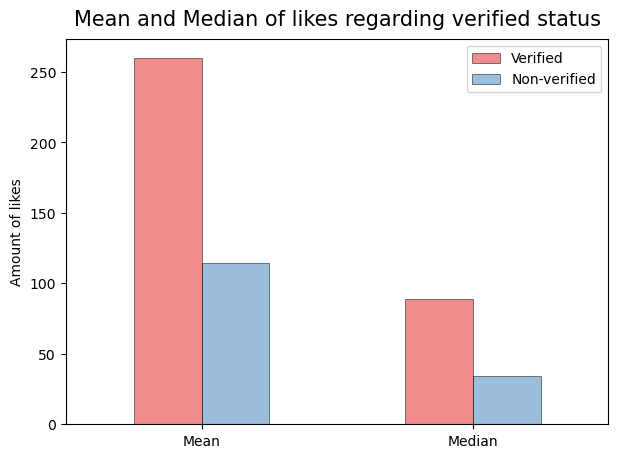

In [19]:
target_train_verified = target_train[data_train['verified']==1]
target_train_no_verified = target_train[data_train['verified']==0]

verified_stats = [target_train_verified.mean(), target_train_verified.median()]
no_verified_stats = [target_train_no_verified.mean(), target_train_no_verified.median()]

df = pd.DataFrame({'Verified': verified_stats, 'Non-verified': no_verified_stats}, index=['Mean', 'Median'])

ax = df.plot(kind='bar', figsize=(7,5), color=['#e41a1c', '#377eb8'], rot=0, alpha=0.5, edgecolor='black', linewidth=0.7)
ax.set_ylabel('Amount of likes')
ax.set_title('Mean and Median of likes regarding verified status', fontsize=15, pad=10)
plt.show()

The economic model of these dating applications is also based on the subscription of a premium access which provides many features that "classic" users do not have. <br>
It could then be important to consider, although the number of such people is negligible, the impact that such a subscription can have on the visibility of women on the application, their time spent on the app and thus their number of likes received.

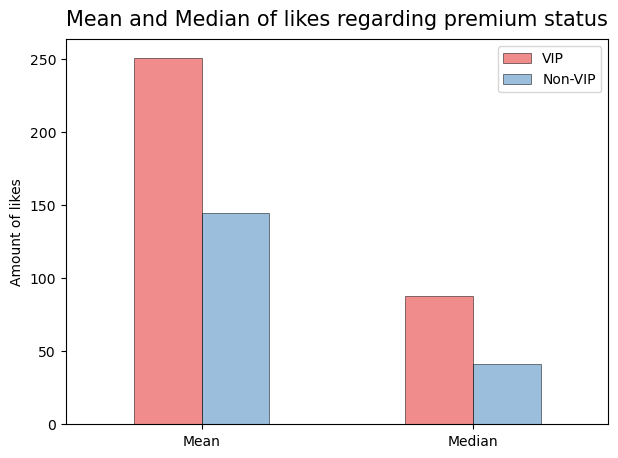

In [20]:
target_train_vip = target_train[data_train['isVip']==1]
target_train_no_vip = target_train[data_train['isVip']==0]

vip_stats = [target_train_vip.mean(), target_train_vip.median()]
no_vip_stats = [target_train_no_vip.mean(), target_train_no_vip.median()]

df = pd.DataFrame({'VIP': vip_stats, 'Non-VIP': no_vip_stats}, index=['Mean', 'Median'])

ax = df.plot(kind='bar', figsize=(7,5), color=['#e41a1c', '#377eb8'], rot=0, alpha=0.5, edgecolor='black', linewidth=0.7)
ax.set_ylabel('Amount of likes')
ax.set_title('Mean and Median of likes regarding premium status', fontsize=15, pad=10)
plt.show()

### <a id='toc1_4_5_'></a>[Correlation study](#toc0_)

To have a more global visualization of the interferences betwwen the features and the target, we can also look at the correlation matrix heatmap.

The correlation matrix shows us the links between the different features, and most importantly it shows us the features that are strongly correlated to our target. Thus we can see that : 
 - The feature "isNew" is negatively correlated to our target. The more new people are, the less likely they are to get many likes. This is finally quite logical. 
 - The feature "counts_details" and "count_pictures" are highly correlated to the number of likes. If you want to maximize your likes, you will have to put a lot of pictures, and develop your biography.
 - The country variable is also correlated with the number of likes. Indeed, if you are in a country where there are few users. Your profile will not be shown much and you will have less likes.

In [24]:
data_train_target

,gender,genderLooking,age,counts_details,counts_pictures,counts_profileVisits,counts_fans,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,...,lastOnlineTime,birthd,connectedToFacebook,locationCity,Latitude,Longitude,description,counts_kisses,age_group,counts_pictures_group
userId,,,,,,,,,,,,,,,,,,,,,
535585c9140ba0be2a8b4ec4,0,3,24,0.90,10,12199,0,1,1,1,...,1.430163e+09,0,0.0,Marktheidenfeld,49.845280,9.606720,1,282,Oldest users,Lot of pictures
535c9b2f190ba04c408b7cc1,0,3,22,0.80,3,84,0,0,0,1,...,1.430035e+09,0,0.0,Bern,46.948271,7.451451,0,0,Youngest users,Few pictures
54d78595c86da1302f8b48b0,0,1,25,0.96,15,2433,0,1,0,0,...,1.428320e+09,0,NaN,NaN,46.314475,11.048029,1,124,Oldest users,Lot of pictures
537e5414190ba0ee648b4db1,0,1,20,0.73,22,2392,4,0,1,0,...,1.428506e+09,0,0.0,Borgomanero,45.698911,8.462367,0,29,Youngest users,Lot of pictures
53055430cb6da17a878b49b6,0,1,22,1.00,3,619,0,1,0,0,...,1.428887e+09,0,0.0,Ghemme,45.598346,8.420903,1,9,Youngest users,Few pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5478cd291b0ba0a9558b473c,0,1,19,0.00,4,855,0,1,0,0,...,1.430644e+09,0,0.0,Busca,44.518132,7.474328,0,12,Youngest users,Few pictures
54a71915ca6da184248b4812,0,1,22,0.42,3,4354,0,1,1,0,...,1.428332e+09,0,NaN,NaN,46.314475,11.048029,1,126,Youngest users,Few pictures
54199bd4c66da10b488b4575,0,1,23,0.50,4,385,7,0,0,0,...,1.429975e+09,0,0.0,Collegno,45.077547,7.572426,0,2,Oldest users,Few pictures


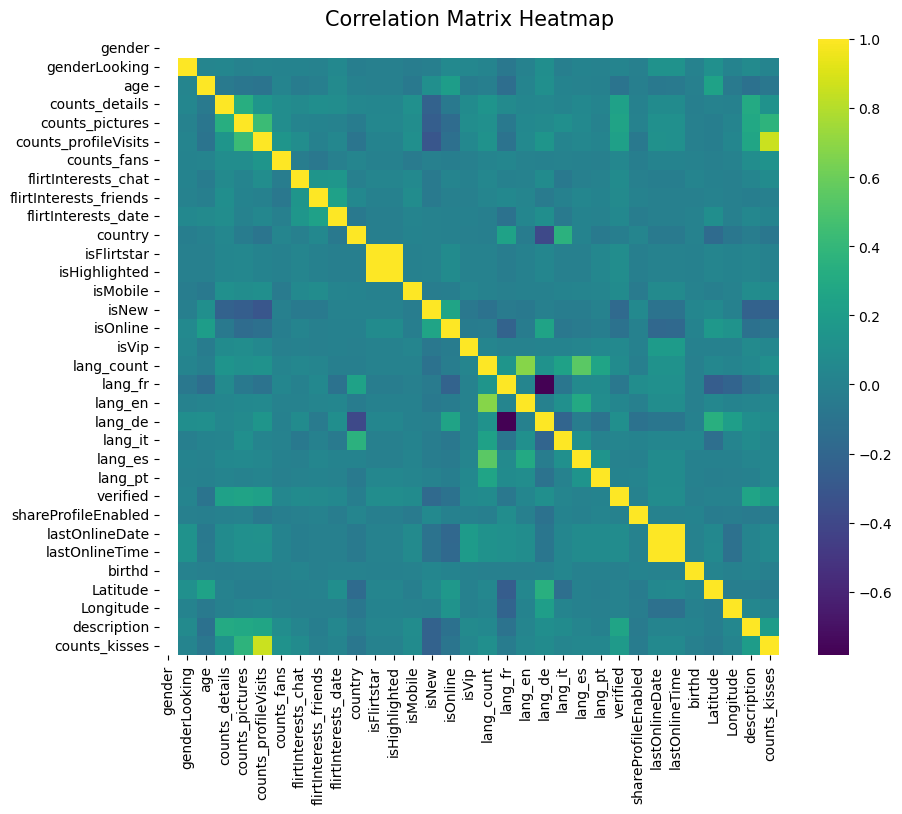

In [26]:
#we create merge_data containing data_train and target_train 
data_train_target_num = data_train_target.drop(['isInfluencer', 'connectedToFacebook', 'locationCity', "age_group", 'counts_pictures_group'], axis=1) #we drop non-numeric columns

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_train_target_num.corr(), annot=False, cmap='viridis', ax=ax)
ax.set_title('Correlation Matrix Heatmap', fontsize=15, pad=10)
plt.show()

## <a id='toc1_5_'></a>[Workflow](#toc0_)
### <a id='toc1_5_1_'></a>[The model to submit](#toc0_)

The submission consists of one file: `estimator.py`  which defines a `FeatureExtractor` class, and `Regressor` class:

- `FeatureExtractor` can (optionally) hold code to calculate and add additional features.
- `Regressor` fits the model and predicts on (new) data, as outputted by the `FeatureExtractor`. The prediction should be in the form of a (n_samples, 1) array with the values predicted.

---

An example `Estimator`, adding an additional feature based on the number of users by age, plus a regressor doing a Random Forest Regression:

##

In [27]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer


class Regressor(BaseEstimator):
    def __init__(self):
        self.model = RandomForestRegressor()

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        y_pred = self.model.predict(X)
        return y_pred


class FeatureExtractor(BaseEstimator):
    def fit(self, X, y):
        self.nb_users_by_age = X.groupby("age").agg({"gender": "count"}).reset_index()
        self.nb_users_by_age.columns = ["age", "nb_users"]
        return self

    def transform(self, X):
        X = X.drop(columns=["locationCity"])

        return X.merge(self.nb_users_by_age, on="age", how="left")


def get_estimator():

    feature_extractor = FeatureExtractor()

    reg = Regressor()

    impute_missing_values = SimpleImputer(strategy="mean")

    pipe = make_pipeline(
        feature_extractor, impute_missing_values, StandardScaler(), reg
    )
    return pipe

In [28]:
model = get_estimator()
model.fit(data_train, target_train)

Pipeline(steps=[('featureextractor', FeatureExtractor()),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('regressor', Regressor())])

In [29]:
y_pred = model.predict(data_test)

In [30]:
y_pred.shape

(799,)

In [31]:
y_pred[:10]

array([140.15,  38.54,   2.58, 586.4 ,  37.74, 726.82, 246.62, 232.06,
        74.57, 222.32])

### <a id='toc1_5_2_'></a>[Evaluation](#toc0_)

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(target_test, y_pred)

78.46780976220275

### <a id='toc1_5_3_'></a>[Evaluation with Cross-Validation](#toc0_)

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

def evaluation(X, y):
    pipe = make_pipeline(
        FeatureExtractor(),
        SimpleImputer(strategy="mean"),
        StandardScaler(),
        Regressor())
    results = cross_validate(
        pipe,
        X,
        y,
        scoring=["r2", "neg_mean_absolute_error"],
        cv=5,
        verbose=1,
        return_train_score=True,
        n_jobs=-1, # Use all cores
    )

    return results

In [35]:
results = evaluation(data_train, target_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.1s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.3s finished


In [36]:
print(
    "Training score R2: {:.3f} +- {:.3f}".format(
        np.mean(results["train_r2"]), np.std(results["train_r2"])
    )
)
print(
    "Testing score R2: {:.3f} +- {:.3f} \n".format(
        np.mean(results["test_r2"]), np.std(results["test_r2"])
    )
)

Training score R2: 0.960 +- 0.003
Testing score R2: 0.736 +- 0.024 



## <a id='toc1_6_'></a>[Submit on Ramp Studio](#toc0_)

To submit on the online challenge, you have to create a new folder in the `submissions` pre-existing folder with a file `estimator.py` inside. You can directly upload that file on the ramp studio.

The score for this challenge will be base on the RMSE score. You can previously work in local to have the best score before submitting by doing:

`ramp-test --submission first_try`

if you put your first estimator in a first_try folder in the submissions' folder.